# Predict A Doctor's Consultation Fee 





We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.



Size of training set: 5961 records

Size of test set: 1987 records

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

In [36]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading tain dataset 
train=pd.read_excel("Final_Train.xlsx")
train


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
#loading test dataset
test=pd.read_csv("docter_fee_Final_Test.csv")
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [4]:
#checking type of data
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [5]:
#checking null values
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

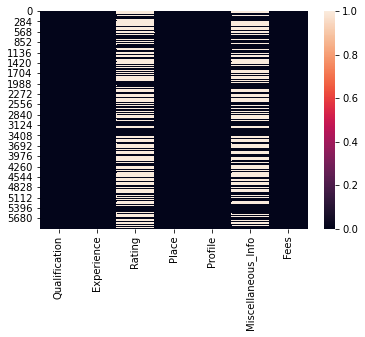

In [6]:
#ploting null values
sns.heatmap(train.isnull())

In [7]:
#checking mode
mode=train["Rating"].mode()
mode

0    100%
dtype: object

In [8]:
#inputing values
train["Rating"]=train["Rating"].replace(np.NaN,'100%')



In [9]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

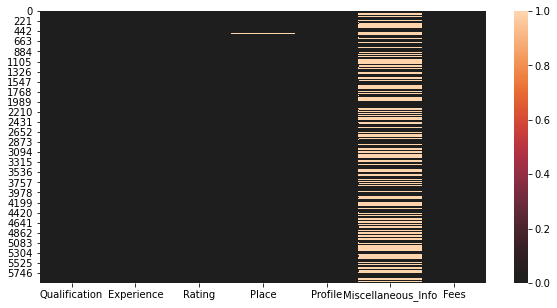

In [10]:
#ploting null values
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(),center=0)

In [11]:
#checking dataset
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


## Summary Statistics 

In [12]:
train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


min value of fees = 5

max value of fees = 950

std is high =190.92

# Data Visualization 

100%    3986
98%      290
99%      259
97%      241
96%      220
95%      178
94%      115
93%      109
90%       66
92%       66
91%       60
89%       42
88%       41
85%       27
82%       23
86%       21
83%       21
80%       19
77%       16
87%       14
79%       13
84%       13
67%       12
81%       12
71%        9
76%        9
75%        8
73%        8
60%        7
74%        7
78%        6
56%        5
68%        5
70%        4
69%        4
72%        3
57%        3
33%        2
63%        2
64%        2
62%        2
55%        2
48%        1
65%        1
45%        1
53%        1
47%        1
7%         1
36%        1
58%        1
40%        1
Name: Rating, dtype: int64


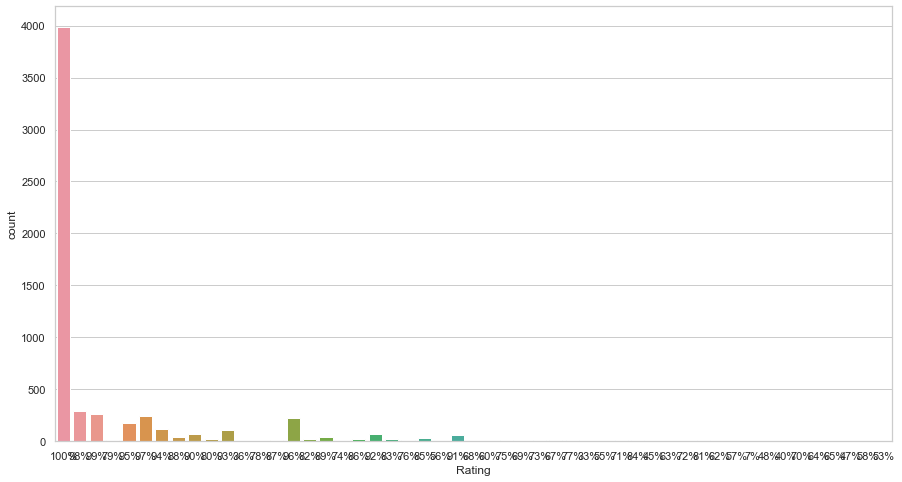

In [13]:
#Checking Ratings Observation
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.countplot(train["Rating"])
print(train["Rating"].value_counts())

Most of 100% rating

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


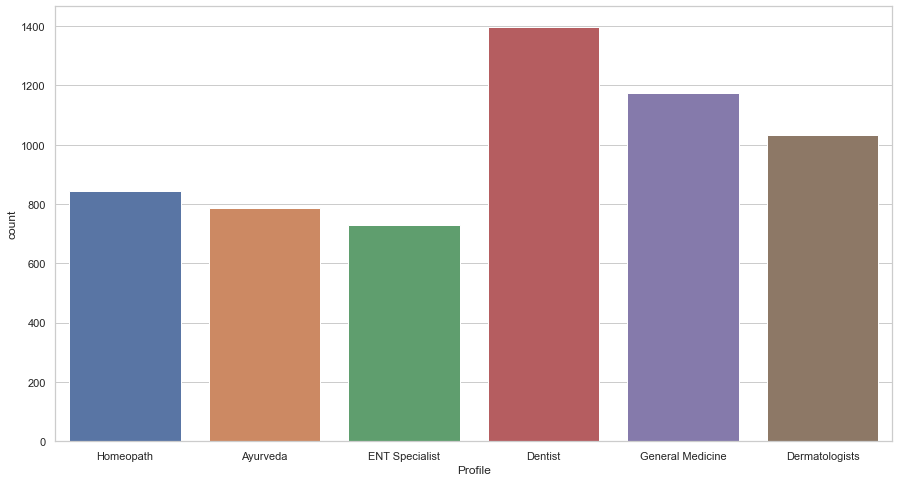

In [14]:
#checking count for profile column
plt.figure(figsize=(15,8))
sns.countplot(train["Profile"])
print(train["Profile"].value_counts())

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


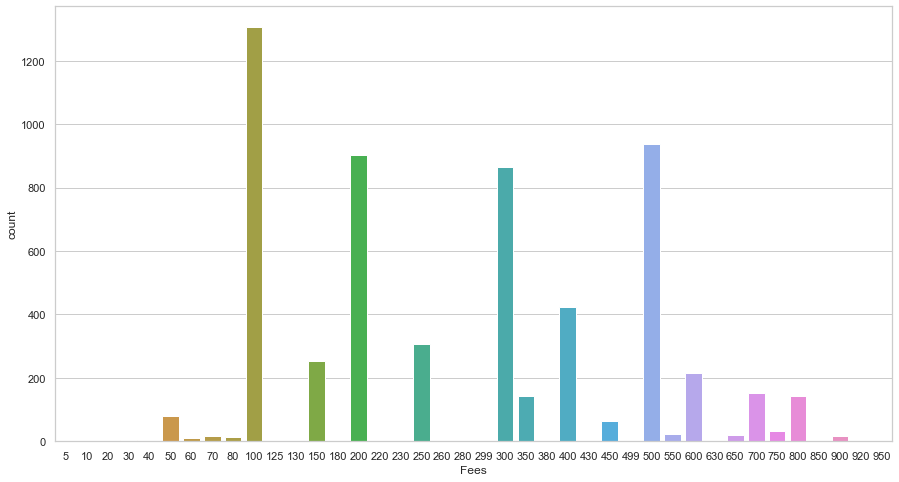

In [15]:
#checking fees column
plt.figure(figsize=(15,8))
sns.countplot(train["Fees"])
print(train["Fees"].value_counts())

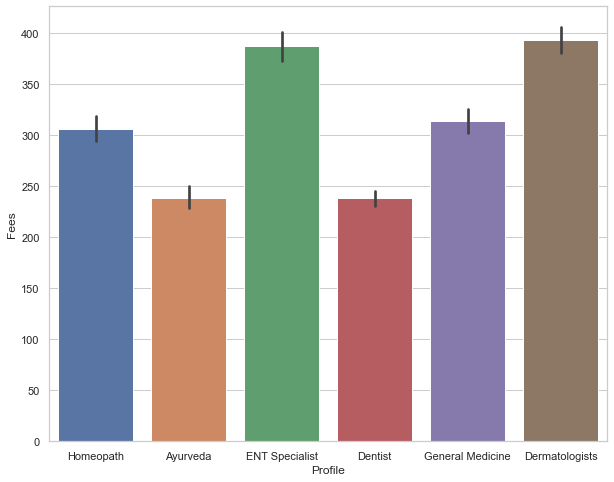

In [16]:
#ckecking barplot b/w fees and profile
plt.figure(figsize=(10,8))
sns.barplot(x="Profile",y="Fees",data=train)
plt.show()

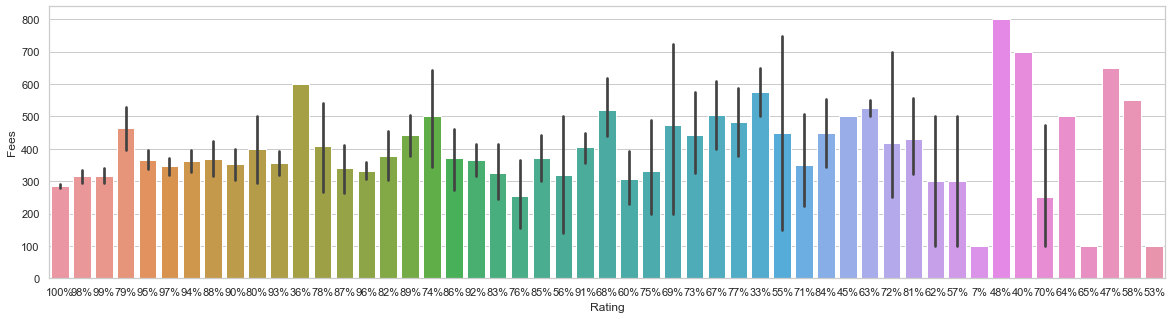

In [17]:
#ckecking barplot b/w Qualification and profile
plt.figure(figsize=(20,5))
sns.barplot(x="Rating",y="Fees",data=train)
plt.show()

In [18]:
#see columns
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [19]:
#changing values in numeric form
Index=['Qualification', 'Experience', 'Rating', 'Place', 'Profile','Miscellaneous_Info']
for col in Index:
    #checking value_counts before factorize
    print(train[col].unique())
    print(train[col].value_counts())
    
    train[col]=pd.factorize(train[col])[0]
    
    #checking value_counts after facotize
    print(train[col].unique())
    print(train[col].value_counts())
    print("\n")

['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                              488
BHMS                                                                                             477
BAMS                                                                                             471
MBBS                                                                                             334
MBBS, MS - ENT                                                                                   220
                                                                                                ... 
MBBS, Diploma in Practical Dermatology, Diploma in D

In [20]:
train["Miscellaneous_Info"].mean()

785.9976514007717

In [21]:
train["Miscellaneous_Info"].replace({-1:81},inplace=True)

In [22]:
#checking dataset
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,0,0,0,0,0,0,100
1,1,1,1,1,1,1,350
2,2,2,0,2,2,81,300
3,3,1,0,3,1,2,250
4,4,3,0,4,1,3,250
...,...,...,...,...,...,...,...
5956,15,12,1,200,2,2995,300
5957,16,28,0,69,4,81,100
5958,16,13,5,203,4,2996,600
5959,7,17,8,275,4,2997,100


Qualification


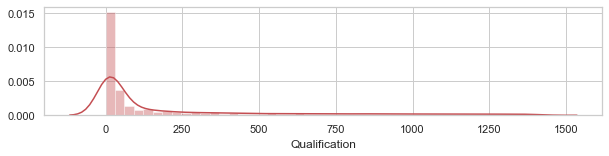



Experience


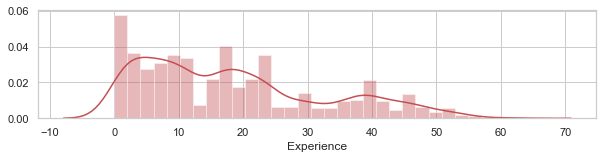



Rating


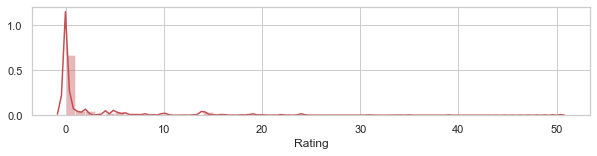



Place


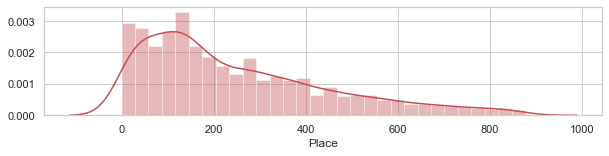



Profile


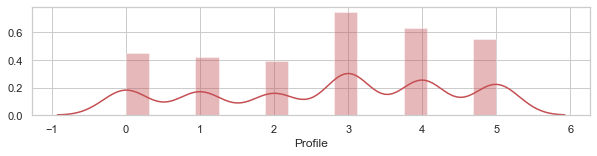



Miscellaneous_Info


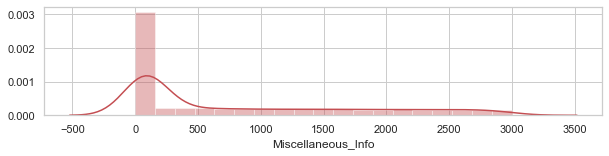



Fees


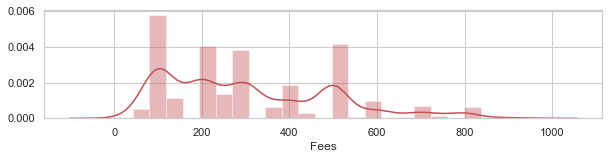

In [23]:
# checking distibution of all columns
for col in train.columns:
    print(col)
    plt.figure(figsize=(10,2))
    sns.distplot(train[col],color="r")
    plt.show()
    print("\n")

## Ploting Box


Qualification


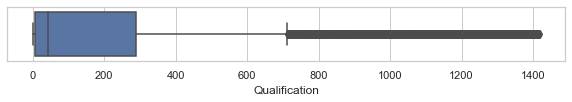

Experience


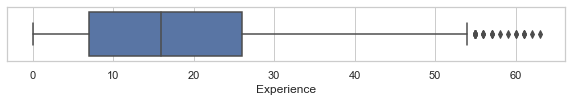

Rating


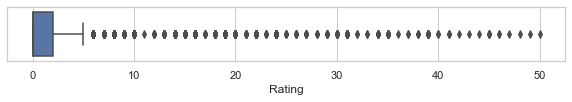

Place


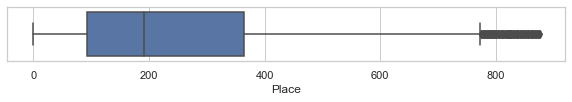

Profile


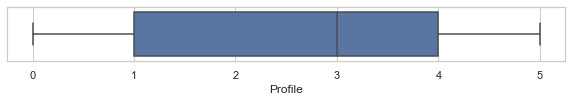

Miscellaneous_Info


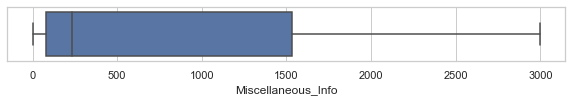

Fees


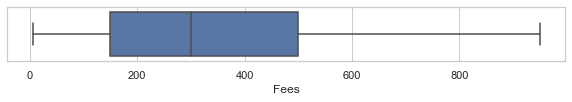

In [24]:
#ploting outliers with boxplot
for col in train.columns:
    print(col)
    plt.figure(figsize=(10,1))
    sns.boxplot(train[col])
    plt.show()

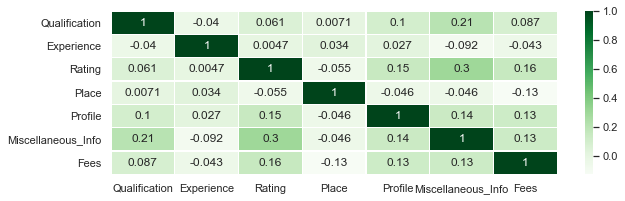

In [25]:

#ploting correlations wit heatmap
plt.figure(figsize=(10,3))
sns.heatmap(train.corr(),annot=True,cmap="Greens",linewidth=.3)

In [26]:
#=>checking outliers with zscore
z=np.abs(zscore(train))
np.where(z>3)


(array([ 272,  275,  293,  333,  346,  377,  458,  465,  585,  590,  632,
         667,  692,  731,  748,  752,  787,  788,  789,  806,  835,  836,
         874,  906,  911,  918,  968,  979,  987,  990, 1018, 1149, 1183,
        1209, 1240, 1303, 1314, 1337, 1392, 1425, 1433, 1444, 1463, 1547,
        1594, 1614, 1631, 1695, 1699, 1703, 1717, 1741, 1744, 1747, 1768,
        1778, 1793, 1796, 1823, 1830, 1852, 1877, 1884, 1917, 1922, 1985,
        2057, 2089, 2161, 2165, 2177, 2237, 2252, 2272, 2277, 2309, 2323,
        2329, 2391, 2393, 2425, 2428, 2473, 2478, 2489, 2500, 2501, 2522,
        2532, 2548, 2567, 2585, 2623, 2695, 2708, 2715, 2726, 2738, 2758,
        2829, 2833, 2962, 2976, 2991, 3027, 3034, 3056, 3085, 3087, 3093,
        3120, 3126, 3144, 3206, 3222, 3224, 3254, 3270, 3315, 3344, 3350,
        3365, 3367, 3537, 3567, 3593, 3604, 3615, 3627, 3628, 3661, 3692,
        3766, 3820, 3854, 3861, 3865, 3964, 3966, 4040, 4047, 4058, 4060,
        4125, 4135, 4219, 4270, 4296, 

In [27]:
#removing outliers
train_n=train[(z<3).all(axis=1)]
print(train_n.shape)
print(train.shape)

(5636, 7)
(5961, 7)


##### Rating and Profile little bit correlated with Fees

## Model Training 

In [28]:
x=train_n.drop("Fees",axis=1)
y=train_n["Fees"]

In [29]:
print(x.shape)
print(y.shape)

(5636, 6)
(5636,)


In [30]:
#import regression/classification libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR,SVC
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB

#import model boosting libraries
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

from sklearn.metrics import r2_score,mean_squared_error,max_error,accuracy_score,confusion_matrix,classification_report 

In [31]:
#spliting data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=58)

models=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]

#creating loop for all algorithm
for i in models:
    print("-------------------------",i,"-------------------------")
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("R2:",r2_score(y_test,pred))
    print("RSME:",np.sqrt(mean_squared_error(y_test,pred)))
    print("max_e:",max_error(y_test,pred))
    print("score:",i.score(x_train,y_train))
    print("\n")

------------------------- LinearRegression() -------------------------
R2: 0.053979840590060224
RSME: 178.53476063137143
max_e: 621.7310192720279
score: 0.05437002670182245


------------------------- SVR() -------------------------
R2: 0.001126615130939812
RSME: 183.4542641191962
max_e: 585.8701539887873
score: -0.0021824353527251095


------------------------- DecisionTreeRegressor() -------------------------
R2: -0.6495389541255008
RSME: 235.7511815206035
max_e: 700.0
score: 0.9983170943789733


------------------------- KNeighborsRegressor() -------------------------
R2: -0.11651348793335581
RSME: 193.95660647468
max_e: 630.0
score: 0.2645415845562802


------------------------- AdaBoostRegressor() -------------------------
R2: 0.035383296621160354
RSME: 180.2810085448766
max_e: 514.5110410094637
score: 0.06398732990180944


------------------------- RandomForestRegressor() -------------------------
R2: 0.09635985904648225
RSME: 174.48992152772152
max_e: 629.0
score: 0.875223187115

In [32]:
y.value_counts()

100    1249
500     886
200     879
300     827
400     380
250     297
150     244
600     201
700     141
350     132
800     127
50       79
450      64
750      32
70       18
550      18
650      14
80       11
60       11
30        4
10        2
180       2
130       2
380       2
40        2
499       1
260       1
220       1
125       1
280       1
5         1
299       1
230       1
430       1
630       1
850       1
20        1
Name: Fees, dtype: int64

As we can see Regression algorithms is not working well.

so, We can try Classification algorithms bcoz target value also in categories

## Useing Classification 

In [44]:
#=> creating loop for all classification model
models2=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for m in models2:
    print("--------------------------------",m,"----------------------------")
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("AC:",accuracy_score(y_test,pred))
    print("score:",m.score(x_train,y_train))
   
    print("\n")

-------------------------------- SVC() ----------------------------
AC: 0.2264017033356991
score: 0.23278921220723917


-------------------------------- DecisionTreeClassifier() ----------------------------
AC: 0.1937544357700497
score: 0.9971611071682044


-------------------------------- KNeighborsClassifier() ----------------------------
AC: 0.1937544357700497
score: 0.41850011828720135


-------------------------------- RandomForestClassifier() ----------------------------
AC: 0.2526614620298084
score: 0.9971611071682044


-------------------------------- AdaBoostClassifier() ----------------------------
AC: 0.22498225691980128
score: 0.2372841258575822


-------------------------------- GradientBoostingClassifier() ----------------------------
AC: 0.24627395315826828
score: 0.5450674237047551




## Useing cross validation score

In [47]:
for c in models2:
    print("-------",c)
    cross=cross_val_score(c,x,y,cv=6)
    print(cross.mean())
    print(cross)
    print("\n")

------- SVC()
0.22587085249888594
[0.22234043 0.2212766  0.2342918  0.21618743 0.22151225 0.23961661]


------- DecisionTreeClassifier()
0.18665907597489406
[0.16489362 0.19787234 0.1970181  0.19062833 0.17891374 0.19062833]


------- KNeighborsClassifier()
0.17636840157403
[0.17234043 0.16808511 0.17678381 0.15761448 0.17571885 0.20766773]


------- RandomForestClassifier()
0.23793665360010272
[0.22659574 0.23829787 0.23109691 0.25878594 0.24068158 0.23216187]


------- AdaBoostClassifier()
0.2201882189442518
[0.23617021 0.22340426 0.23642173 0.23216187 0.23642173 0.15654952]


------- GradientBoostingClassifier()
0.22977288348099303
[0.24574468 0.21382979 0.26411076 0.26517572 0.22364217 0.16613419]




In [35]:
#chooseing best model
max_ac=0

for r in range(40,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=.25)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    predr=rfc.predict(x_test)
    ac=accuracy_score(y_test,predr)
    if ac>max_ac:
        max_ac=ac
        final_r=r
print("max acuracy =",max_ac,"from random_state =",final_r)        

max acuracy = 0.2654364797728886 from random_state = 49


## Using GridSeachCV for Hyperparameter Tunning

In [37]:
# applying gridsearchcv
para={"n_estimators":[50,100,150,200,250,300],'criterion':['gini','entropy'],}

grid=GridSearchCV(rfc,para)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [38]:
# = see best parameters
grid.best_params_

{'criterion': 'gini', 'n_estimators': 300}

In [39]:
# apply best parameters
for r in range(40,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=.25)
    rfc=RandomForestClassifier(criterion='gini', n_estimators=300)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>max_ac:
        max_ac=ac
        final_r=r
print("max acuracy =",max_ac,"from random_state =",final_r)  

max acuracy = 0.2654364797728886 from random_state = 49


In [43]:
#apply best random state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=.25)
rf=RandomForestClassifier(criterion='gini', n_estimators= 300)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("AC:",accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
  

AC: 0.26330731014904185
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   1   0   0   0   6   0   0   0   0   2   0   0   0   3   0   0
    0   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   4   1   3   1 137   0   0   2   0  49   6   0   0  30   4   0
    9   1   0  48   0   3   0   1   1   1   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   

In [50]:
# changing test data like train

#changing in numeric form
Index=['Qualification', 'Experience', 'Rating', 'Place', 'Profile','Miscellaneous_Info']
for col in Index:
    test[col]=pd.factorize(test[col])[0]
    
   

test["Rating"].replace({-1:1},inplace=True)
test["Miscellaneous_Info"].replace({-1:81},inplace=True)

In [51]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,0,0,1,0,0,81
1,1,1,1,1,1,81
2,2,2,0,2,2,0
3,3,3,1,3,3,81
4,4,4,1,4,4,1
...,...,...,...,...,...,...
1982,628,29,1,19,3,81
1983,118,10,1,590,2,81
1984,629,7,1,146,0,81
1985,9,37,5,281,4,1082


In [52]:
#predicting test value
pedict=rf.predict(test)

In [58]:
prd=pd.DataFrame(pedict)
prd

,0
0,300
1,350
2,300
3,200
4,200
...,...
1982,500
1983,300
1984,200
1985,100


In [59]:
#saveing predicted values
prd.to_csv("docter_fees_prediction.csv")

In [55]:
#saveing best model
import joblib

joblib.dump(rf,"docter_consultation_fees.pkl")

['docter_consultation_fees.pkl']